## Step 4
Continuing from sentimentlive_btc.

Testing adding the funding rate. Way less data considering that the funding data starts from 2020 but just experimenting a little bit. to do: try the same testing environment but with a 1h price. would be more data and the funding maybe more usefull considering that it's every 8h.

In [2]:
import yfinance as yf
import os
import pandas as pd

In [49]:
btc_ticker = yf.Ticker("BTC-USD")

In [50]:
btc = btc_ticker.history(period="max")

In [51]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-28 00:00:00+00:00,69392.195312,69514.640625,67227.156250,68296.218750,32722265965,0.0,0.0
2024-05-29 00:00:00+00:00,68296.351562,68852.460938,67101.492188,67578.093750,26707072906,0.0,0.0
2024-05-30 00:00:00+00:00,67576.085938,69500.539062,67118.078125,68364.992188,29509712534,0.0,0.0


In [52]:
btc.index = pd.to_datetime(btc.index)

In [53]:
del btc["Dividends"]
del btc["Stock Splits"]

In [54]:
btc.columns = [c.lower() for c in btc.columns]

<Axes: xlabel='Date'>

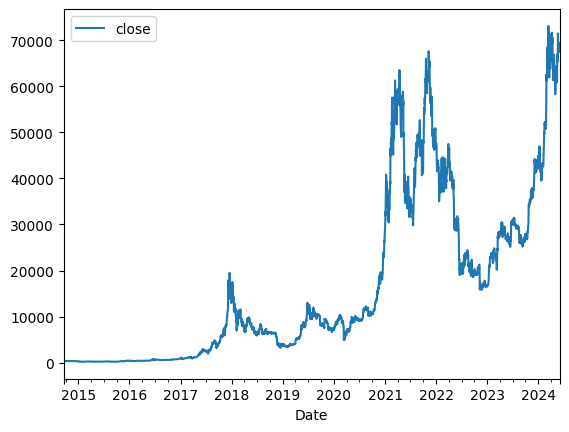

In [55]:
btc.plot.line(y="close", use_index=True)

In [56]:
funding = pd.read_csv("data/funding_rate_history_BTCUSDT.csv", index_col=0, parse_dates=True)

In [57]:
del funding['Symbol']

In [58]:
rolling_funding = funding.rolling(3).mean()

In [59]:
rolling_funding.dropna()

,Funding Rate
Time(UTC),
2024-05-31 08:00:00,0.0001
2024-05-31 00:00:00,0.0001
2024-05-30 16:00:00,0.0001
2024-05-30 08:00:00,0.0001
2024-05-30 00:00:00,0.0001
...,...
2020-03-27 00:00:00,0.0001
2020-03-26 16:00:00,0.0001
2020-03-26 08:00:00,0.0001


In [60]:
wiki = pd.read_csv("wikipedia_edits.csv", index_col=0, parse_dates=True)

In [61]:
wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.133333,-0.018351,0.025000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2024-05-26,1.000000,-0.156696,0.243519
2024-05-27,0.900000,-0.145586,0.221296
2024-05-28,0.900000,-0.145586,0.221296
2024-05-29,0.900000,-0.145586,0.221296


## Step 5
Preparing data for machine learning.

In [62]:
print(btc.index.dtype)
print(wiki.index.dtype)
print(funding.index.dtype)

datetime64[ns, UTC]
datetime64[ns]
datetime64[ns]


In [63]:
btc.index = btc.index.tz_convert(None)  # Convert to tz-naive

In [65]:
btc = btc.merge(rolling_funding, left_index=True, right_index=True)
btc = btc.merge(wiki, left_index=True, right_index=True)

In [66]:
btc['funding_avg'] = btc['Funding Rate']

In [67]:
del btc['Funding Rate']

In [68]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1527 entries, 2020-03-26 to 2024-05-30
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   open           1527 non-null   float64
 1   high           1527 non-null   float64
 2   low            1527 non-null   float64
 3   close          1527 non-null   float64
 4   volume         1527 non-null   int64  
 5   edit_count     1527 non-null   float64
 6   sentiment      1527 non-null   float64
 7   neg_sentiment  1527 non-null   float64
 8   funding_avg    1527 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 119.3 KB


In [85]:
btc["tomorrow"] = btc["close"].shift(-7) # originally shift -1 to see tomorrow's prediction

In [86]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,funding_avg,tomorrow,...,trend_2,close_ratio_7,edit_7,trend_7,close_ratio_60,edit_60,trend_60,close_ratio_365,edit_365,trend_365
2020-03-26,6675.170898,6735.463867,6590.962891,6716.440430,35319797642,0.633333,-0.131406,0.206349,0.000100,6793.624512,...,NaN,1.000000,0.633333,NaN,1.000000,0.633333,NaN,1.000000,0.633333,NaN
2020-03-27,6719.389160,6793.836426,6466.701660,6469.798340,34585598367,0.633333,-0.131406,0.206349,0.000100,6733.387207,...,0.0,0.981295,0.633333,0.000000,0.981295,0.633333,0.000000,0.981295,0.633333,0.000000
2020-03-28,6467.253906,6467.500977,6117.837891,6242.193848,34885225901,0.533333,-0.120249,0.184127,0.000100,6867.527344,...,0.0,0.963875,0.600000,0.000000,0.963875,0.600000,0.000000,0.963875,0.600000,0.000000
2020-03-29,6245.624512,6250.467285,5920.085938,5922.042969,28373690931,0.533333,-0.120249,0.184127,0.000100,6791.129395,...,0.0,0.934427,0.583333,0.000000,0.934427,0.583333,0.000000,0.934427,0.583333,0.000000
2020-03-30,5925.538574,6517.195801,5903.234375,6429.841797,37101651525,0.533333,-0.120249,0.184127,0.000100,7271.781250,...,0.5,1.011608,0.573333,0.250000,1.011608,0.573333,0.250000,1.011608,0.573333,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-26,69264.289062,69506.226562,68183.890625,68518.093750,15628433737,1.000000,-0.156696,0.243519,0.000100,NaN,...,0.5,0.989029,0.857143,0.428571,1.043365,0.429444,0.483333,1.623800,1.963470,0.512329
2024-05-27,68512.179688,70597.882812,68232.500000,69394.554688,25870990717,0.900000,-0.145586,0.221296,0.000100,NaN,...,0.5,1.005941,0.904762,0.428571,1.057073,0.441111,0.483333,1.640172,1.965571,0.512329
2024-05-28,69392.195312,69514.640625,67227.156250,68296.218750,32722265965,0.900000,-0.145586,0.221296,0.000100,NaN,...,0.5,0.993807,0.942857,0.428571,1.040765,0.452778,0.483333,1.609985,1.967671,0.512329
2024-05-29,68296.351562,68852.460938,67101.492188,67578.093750,26707072906,0.900000,-0.145586,0.221296,0.000102,NaN,...,0.0,0.986524,0.938095,0.428571,1.030362,0.464444,0.483333,1.588964,1.969680,0.512329


In [87]:
btc["target"] = (btc["tomorrow"] > btc["close"]).astype(int)

In [88]:
btc["target"].value_counts()

target
1    824
0    703
Name: count, dtype: int64

## Step 6
Training our baseline ML model.

In [89]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

train = btc.iloc[:-200]
test = btc[-200:]

predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment", "funding_avg"]
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [90]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.8076923076923077

## Step 7
Evaluating error with backtesting.

In [91]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [92]:
def backtest(data, model, predictors, start=1095, step=150):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

## Step 8
Using an XGBoost model.

In [93]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)
predictions = backtest(btc, model, predictors)

In [94]:
precision_score(predictions["target"], predictions["predictions"])

0.6708860759493671

## Step 9
Improving precision with trends.

In [95]:
def compute_rolling(btc):
    horizons = [2,7,60,365]
    new_predictors = ["close", "sentiment", "neg_sentiment"]

    for horizon in horizons:
        rolling_averages = btc.rolling(horizon, min_periods=1).mean()

        ratio_column = f"close_ratio_{horizon}"
        btc[ratio_column] = btc["close"] / rolling_averages["close"]

        edit_column = f"edit_{horizon}"
        btc[edit_column] = rolling_averages["edit_count"]

        rolling = btc.rolling(horizon, closed="left", min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        btc[trend_column] = rolling["target"]

        new_predictors += [ratio_column, trend_column, edit_column]
    return btc, new_predictors

In [96]:
btc, new_predictors = compute_rolling(btc.copy())

In [97]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,funding_avg,tomorrow,...,trend_2,close_ratio_7,edit_7,trend_7,close_ratio_60,edit_60,trend_60,close_ratio_365,edit_365,trend_365
2020-03-26,6675.170898,6735.463867,6590.962891,6716.440430,35319797642,0.633333,-0.131406,0.206349,0.000100,6793.624512,...,NaN,1.000000,0.633333,NaN,1.000000,0.633333,NaN,1.000000,0.633333,NaN
2020-03-27,6719.389160,6793.836426,6466.701660,6469.798340,34585598367,0.633333,-0.131406,0.206349,0.000100,6733.387207,...,1.0,0.981295,0.633333,1.000000,0.981295,0.633333,1.00,0.981295,0.633333,1.000000
2020-03-28,6467.253906,6467.500977,6117.837891,6242.193848,34885225901,0.533333,-0.120249,0.184127,0.000100,6867.527344,...,1.0,0.963875,0.600000,1.000000,0.963875,0.600000,1.00,0.963875,0.600000,1.000000
2020-03-29,6245.624512,6250.467285,5920.085938,5922.042969,28373690931,0.533333,-0.120249,0.184127,0.000100,6791.129395,...,1.0,0.934427,0.583333,1.000000,0.934427,0.583333,1.00,0.934427,0.583333,1.000000
2020-03-30,5925.538574,6517.195801,5903.234375,6429.841797,37101651525,0.533333,-0.120249,0.184127,0.000100,7271.781250,...,1.0,1.011608,0.573333,1.000000,1.011608,0.573333,1.00,1.011608,0.573333,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-26,69264.289062,69506.226562,68183.890625,68518.093750,15628433737,1.000000,-0.156696,0.243519,0.000100,NaN,...,0.0,0.989029,0.857143,0.285714,1.043365,0.429444,0.45,1.623800,1.963470,0.569863
2024-05-27,68512.179688,70597.882812,68232.500000,69394.554688,25870990717,0.900000,-0.145586,0.221296,0.000100,NaN,...,0.0,1.005941,0.904762,0.142857,1.057073,0.441111,0.45,1.640172,1.965571,0.567123
2024-05-28,69392.195312,69514.640625,67227.156250,68296.218750,32722265965,0.900000,-0.145586,0.221296,0.000100,NaN,...,0.0,0.993807,0.942857,0.142857,1.040765,0.452778,0.45,1.609985,1.967671,0.567123
2024-05-29,68296.351562,68852.460938,67101.492188,67578.093750,26707072906,0.900000,-0.145586,0.221296,0.000102,NaN,...,0.0,0.986524,0.938095,0.142857,1.030362,0.464444,0.45,1.588964,1.969680,0.567123


In [98]:
predictions = backtest(btc, model, new_predictors)

In [99]:
precision_score(predictions["target"], predictions["predictions"])

0.8518518518518519

In [100]:
predictions

,target,predictions
2023-03-26,1,1
2023-03-27,1,1
2023-03-28,1,1
2023-03-29,0,1
2023-03-30,1,1
...,...,...
2024-05-26,0,0
2024-05-27,0,0
2024-05-28,0,0
2024-05-29,0,0
